In [29]:
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import os
import pandas as pd 
from scipy.io import wavfile #for audio processing
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

### Swahili

In [2]:
sample_swah='../data/SWAHILI/data/train/wav/SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part10.wav'

In [3]:
x_swah , sr_swah=librosa.load(sample_swah)

In [4]:
print(type(x_swah), type(sr_swah))

<class 'numpy.ndarray'> <class 'int'>


In [5]:
print(x_swah)
print(sr_swah)

[0.02953335 0.03225018 0.02603412 ... 0.09593043 0.09478676 0.05775513]
22050


In [6]:
ipd.Audio(sample_swah)

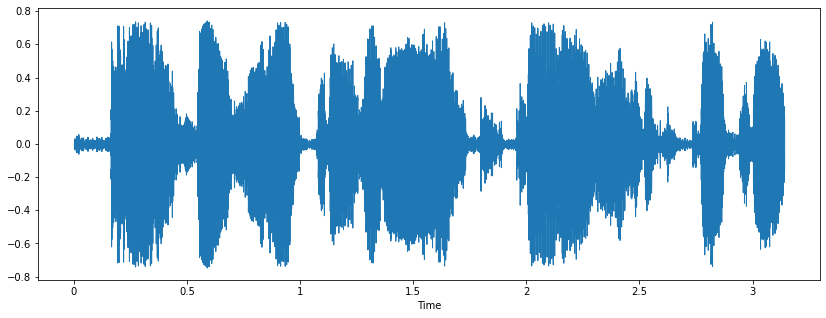

In [7]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x_swah, sr=sr_swah)

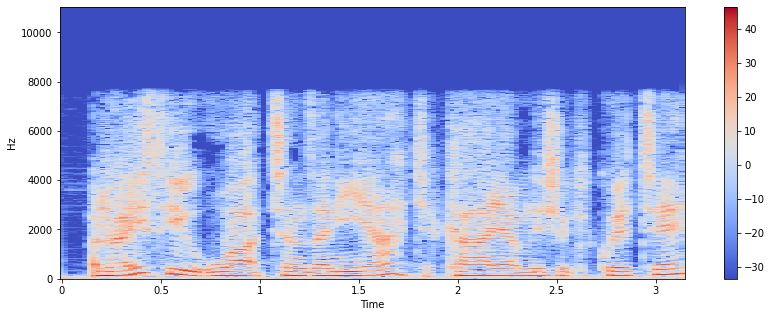

In [8]:
X_swah = librosa.stft(x_swah)
Xdb_swah = librosa.amplitude_to_db(abs(X_swah))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb_swah, sr=sr_swah, x_axis='time', y_axis='hz')
plt.colorbar()

In [9]:
def tran_loader_swah(filename):
  name_to_text = {}
  with open (filename, encoding="utf-8")as f:
    f.readline()
    for line in f:
      name=line.split("\t")[0]
      text=line.split("\t")[1]
      text=text.replace('\n','')
      name_to_text[name]=text
    return name_to_text

In [10]:
transcription=tran_loader_swah("../data/SWAHILI/data/train/text")

In [11]:
transcription

{'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part100': 'yanayo andaliwa nami pendo pondo idhaa ya kiswahili',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part101': 'inayokutangazia moja kwa moja kutoka jijini dar es salaam tanzania',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part102': 'juma hili bara la afrika limeshuhudia raia wa nchi za niger',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part103': 'wakipiga kura ya maoni ilikufanya mabadiliko ya',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part104': 'kule abidjan raia wa jiji hilo',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part105': 'walipata fursa ya kutumia haki yao ya msingi',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part106': 'waziri mkuu wa zamani alasane watara',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part107': 'na rais aliyetangulia henry konan berd

In [12]:
def meta_data(trans, path ):
  target=[]
  features=[]
  filenames=[]
  duration_of_recordings=[]
  for k in trans:
    filename=path+k +".wav"
    filenames.append(filename)
    audio, fs = librosa.load(filename, sr=None)
    duration_of_recordings.append(float(len(audio)/fs))
   
    lable = trans[k]
    target.append(lable)
  return filenames, target,duration_of_recordings

In [13]:
filenames, target,duration_of_recordings= meta_data(transcription,'../data/SWAHILI/data/train/wav/')

In [14]:
import pandas as pd 
data=pd.DataFrame({'key': filenames,'text': target, 'duration':duration_of_recordings})

In [15]:
data

,key,text,duration
0,../data/SWAHILI/data/train/wav/SWH-05-20101106...,yanayo andaliwa nami pendo pondo idhaa ya kisw...,3.100000
1,../data/SWAHILI/data/train/wav/SWH-05-20101106...,inayokutangazia moja kwa moja kutoka jijini da...,3.650000
2,../data/SWAHILI/data/train/wav/SWH-05-20101106...,juma hili bara la afrika limeshuhudia raia wa ...,3.900000
3,../data/SWAHILI/data/train/wav/SWH-05-20101106...,wakipiga kura ya maoni ilikufanya mabadiliko ya,2.940000
4,../data/SWAHILI/data/train/wav/SWH-05-20101106...,kule abidjan raia wa jiji hilo,2.450000
...,...,...,...
10174,../data/SWAHILI/data/train/wav/SWH-15-20110310...,na somo lile lililopokelewa kule kenya,2.500062
10175,../data/SWAHILI/data/train/wav/SWH-15-20110310...,ambapo mtu aliyeshindwa kwenye uchaguzi,2.910000
10176,../data/SWAHILI/data/train/wav/SWH-15-20110310...,ni kauli yake mchambuzi wa masuala ya siasa,2.950000
10177,../data/SWAHILI/data/train/wav/SWH-15-20110310...,mwanasheria anayemtetea rais wa zamani wa liberia,2.590000


In [16]:
from pydub import AudioSegment

In [17]:
# sound1 = AudioSegment.from_wav("../data/SWAHILI/data/train/wav/SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part10.wav",
#                                 )

In [18]:
# import wave, array

# def make_stereo(file1, output):
#     ifile = wave.open(file1)
#     print(ifile.getparams())
#     # (1, 2, 44100, 2013900, 'NONE', 'not compressed')
#     (nchannels, sampwidth, framerate, nframes, comptype, compname) = ifile.getparams()
#     assert comptype == 'NONE'  # Compressed not supported yet
#     array_type = {1:'B', 2: 'h', 4: 'l'}[sampwidth]
#     left_channel = array.array(array_type, ifile.readframes(nframes))[::nchannels]
#     ifile.close()

#     stereo = 2 * left_channel
#     stereo[0::2] = stereo[1::2] = left_channel

#     ofile = wave.open(output, 'w')
#     ofile.setparams((2, sampwidth, framerate, nframes, comptype, compname))
#     ofile.writeframes(stereo.tostring())
#     ofile.close()

# make_stereo("Input.wav", "Output.wav")

### Amharic

In [18]:
samp_amh='../data/AMHARIC/data/train/wav/tr_10000_tr097082.wav'

In [19]:
x_amha , sr_amha=librosa.load(samp_amh)

In [20]:
print(x_amha)
print(sr_amha)

[-0.11535194 -0.13093    -0.11132754 ... -0.13838086 -0.12441102
  0.        ]
22050


In [21]:
ipd.Audio(samp_amh)

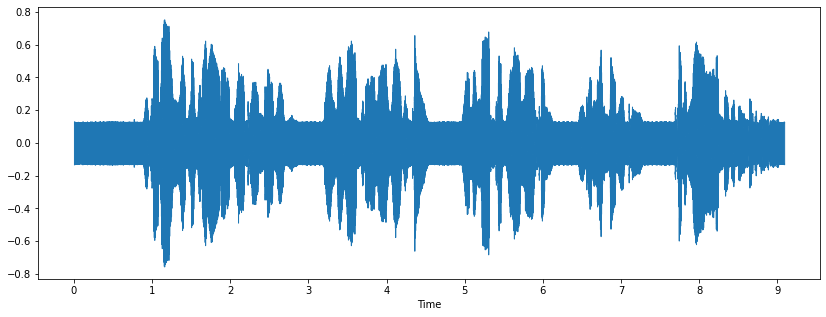

In [22]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x_amha, sr=sr_amha)

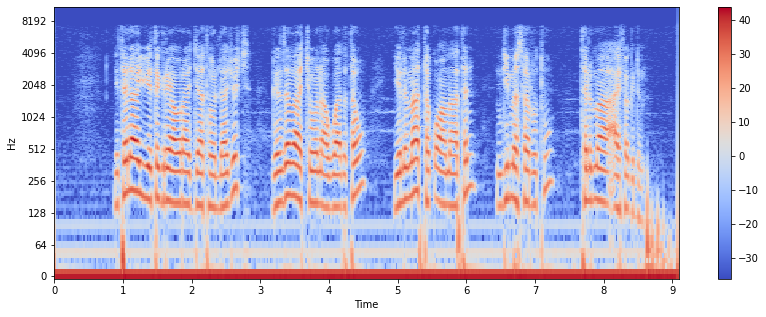

In [23]:
X_amha = librosa.stft(x_amha)
Xdb_swah = librosa.amplitude_to_db(abs(X_amha))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb_swah, sr=sr_amha, x_axis='time', y_axis='log')
plt.colorbar()

In [24]:
def tran_loader_amha(filename):
    name_to_text = {}
    with open (filename, encoding="utf-8")as f:
        f.readline()
        for line in f:
            name=line.split(" ")[0]
            text=line.split(" ")[1]
    #       text=text.replace('\n','')
            name_to_text[name]=text
    return name_to_text

In [25]:
transcription=tran_loader_amha('../data/AMHARIC/data/train/text')

In [26]:
filenames, target,duration_of_recordings= meta_data(transcription,'../data/AMHARIC/data/train/wav/')

In [27]:
data_amha=pd.DataFrame({'key': filenames,'text': target, 'duration':duration_of_recordings})

In [73]:
working_dir = 'C:/Users/Faith Bagire/PycharmProjects/pythonProject/african_language-Speech_Recognition/data/AMHARIC/data/train/wav/'

In [34]:
ss=np.stack([x_amha,x_amha],axis=1)

In [40]:
np.shape(np.stack([ss,ss],axis=1))

(200391, 2, 2)

In [28]:
# steroe_ls=[]
# mono_ls=[]
# for file in os.listdir(working_dir):  # get the list of files
#     x,s=librosa.load(file)
#     try:
#         steroe_ls.append(str(file))
#     except IndexError:
#         mono_ls.append(str(file))

In [ ]:
data_amha['shape_audio']=data_amha['key'].apply(lambda x: librosa.load(x))

In [ ]:
da